In [3]:
import servicex
from servicex import ServiceXDataset
from func_adl_servicex import ServiceXDatasetSource
import matplotlib.pyplot as plt

In [4]:
dataset = ServiceXDataset("mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00")
query = ServiceXDatasetSource(dataset) \
    .SelectMany('lambda e: (e.Jets("AntiKt4EMTopoJets"))') \
    .Where('lambda j: j.pt()/1000>20 and j.eta()/1000/4.5') \
    .Select('lambda j: (j.getAttributeFloat("LArQuality"))') \
    .AsPandasDF("JetMoment") \
    .value()

In [5]:
print(query)

        JetMoment
entry            
0        0.391937
1        0.000000
2        0.000000
3        0.000000
4        0.000000
...           ...
267084   0.000000
267085   0.000000
267086   0.000000
267087   0.000000
267088   0.000000

[3551964 rows x 1 columns]


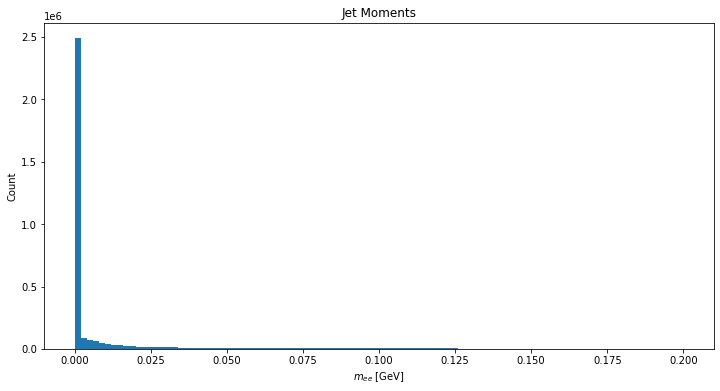

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(query.JetMoment, bins=100, range=(0,0.20))
plt.title('Jet Moments')
plt.xlabel('$m_{ee}$ [GeV]')
plt.ylabel('Count')
plt.show()